# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

## Part 1: Combine multiple DataFrame objects to a large dataframe ( 5 pts )

Given the following temperature datasets, combine them to a large dataframe using `pandas.concat` command

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv")
df_temp = pd.concat([df1, df2], ignore_index=True)
df_temp

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181216,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0
181217,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0
181218,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN
181219,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [3]:
df_fips = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv")
df_station = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")

In [4]:
df_merged = pd.merge(df_temp, df_station, on='ID')
df_merged['FIPS 10-4'] = df_merged['ID'].str[:2]
df_merged

,ID,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12,LATITUDE,LONGITUDE,STNELEV,NAME,FIPS 10-4
0,AG000060390,1901,1034.0,844.0,1164.0,1534.0,1564.0,2354.0,2444.0,2364.0,2214.0,1604.0,1364.0,1004.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG
1,AG000060390,1902,984.0,1194.0,1254.0,1544.0,1514.0,1984.0,2484.0,2574.0,2164.0,1694.0,1494.0,1134.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG
2,AG000060390,1903,1144.0,1064.0,1266.0,1346.0,1646.0,1906.0,2326.0,2446.0,2146.0,1926.0,1356.0,1056.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG
3,AG000060390,1904,926.0,1126.0,1136.0,1406.0,1836.0,2126.0,2516.0,2606.0,2076.0,1826.0,1376.0,1246.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG
4,AG000060390,1905,906.0,866.0,1386.0,1576.0,1596.0,2146.0,2326.0,2496.0,2206.0,1716.0,1386.0,1076.0,36.7167,3.250,24.0,ALGER_DAR_EL_BEIDA,AG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181216,ZI000067983,2012,2186.0,NaN,2157.0,1833.0,1835.0,1625.0,1563.0,NaN,2034.0,NaN,2298.0,2199.0,-20.2000,32.616,1132.0,CHIPINGE,ZI
181217,ZI000067983,2013,NaN,2163.0,2054.0,1870.0,1729.0,1686.0,1528.0,1862.0,2100.0,1967.0,2258.0,2142.0,-20.2000,32.616,1132.0,CHIPINGE,ZI
181218,ZI000067983,2014,NaN,2187.0,NaN,NaN,NaN,NaN,NaN,NaN,2087.0,2110.0,2297.0,NaN,-20.2000,32.616,1132.0,CHIPINGE,ZI
181219,ZI000067983,2015,2175.0,2251.0,2083.0,1952.0,1880.0,1670.0,1650.0,1810.0,2010.0,2290.0,2230.0,2405.0,-20.2000,32.616,1132.0,CHIPINGE,ZI


In [5]:
df = pd.merge(df_merged, df_fips, on='FIPS 10-4')
df = df.drop(columns=["STNELEV", "ISO 3166", "FIPS 10-4"])
df.columns = ['ID', 'Year', 'Mon_1', 'Mon_2', 'Mon_3', 'Mon_4', 'Mon_5', 'Mon_6', "Mon_7", 'Mon_8', 'Mon_9', 'Mon_10', 
                     'Mon_11', 'Mon_12', 'Latitude', 'Longitude', 'Station_Name', 'Country_Name']
mon_list = ["Mon_" + str(i) for i in range(1, 13)]
df[mon_list] = df[mon_list].div(100)

df

,ID,Year,Mon_1,Mon_2,Mon_3,Mon_4,Mon_5,Mon_6,Mon_7,Mon_8,Mon_9,Mon_10,Mon_11,Mon_12,Latitude,Longitude,Station_Name,Country_Name
0,AG000060390,1901,10.34,8.44,11.64,15.34,15.64,23.54,24.44,23.64,22.14,16.04,13.64,10.04,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
1,AG000060390,1902,9.84,11.94,12.54,15.44,15.14,19.84,24.84,25.74,21.64,16.94,14.94,11.34,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
2,AG000060390,1903,11.44,10.64,12.66,13.46,16.46,19.06,23.26,24.46,21.46,19.26,13.56,10.56,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
3,AG000060390,1904,9.26,11.26,11.36,14.06,18.36,21.26,25.16,26.06,20.76,18.26,13.76,12.46,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
4,AG000060390,1905,9.06,8.66,13.86,15.76,15.96,21.46,23.26,24.96,22.06,17.16,13.86,10.76,36.7167,3.250,ALGER_DAR_EL_BEIDA,Algeria
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,ZA000067743,2020,NaN,24.00,23.75,NaN,NaN,NaN,16.05,NaN,NaN,NaN,NaN,NaN,-17.8170,25.817,LIVINGSTONE,Zambia
181311,ZAM00067663,2011,22.80,22.84,22.50,21.90,20.00,18.40,17.00,18.65,22.80,24.90,24.65,24.00,-14.4500,28.467,KABWE_MILLIKEN,Zambia
181312,ZAM00067663,2012,23.10,22.34,22.95,19.70,18.50,17.50,NaN,NaN,NaN,NaN,NaN,NaN,-14.4500,28.467,KABWE_MILLIKEN,Zambia
181313,ZAM00067663,2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.85,-14.4500,28.467,KABWE_MILLIKEN,Zambia


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [6]:
def query_climate(df, country, year_begin, year_end, month):
    
    # Keep rows with specified country and year
    df_output = df[(df['Country_Name'] == country) & (year_begin<=df['Year']) & (df['Year']<=year_end)]
    
    # Keep rows with specified month
    mon_x = "Mon_" + str(month)
    mon_list = ["Mon_" + str(i) for i in range(1, 13)]
    months_drop = [mon for mon in mon_list if mon != mon_x]
    df_output = df_output.drop(columns=months_drop)
    
    # More processing
    df_output = df_output.drop(columns=['ID'])
    df_output['Month'] = month
    
    # Current column order: Year, Mon_x, Latitude, Longitude, Station_Name, Country_Name, Month
    # Rearrange the columns
    df_output = df_output[['Station_Name','Latitude','Longitude','Country_Name','Year','Month',mon_x]]
    df_output.columns=['NAME','LATITUDE','LONGITUDE','Country','Year','Month','Temp']
    
    return df_output

Run this example and check if you get the correct result, your obtained dataframe looks like:

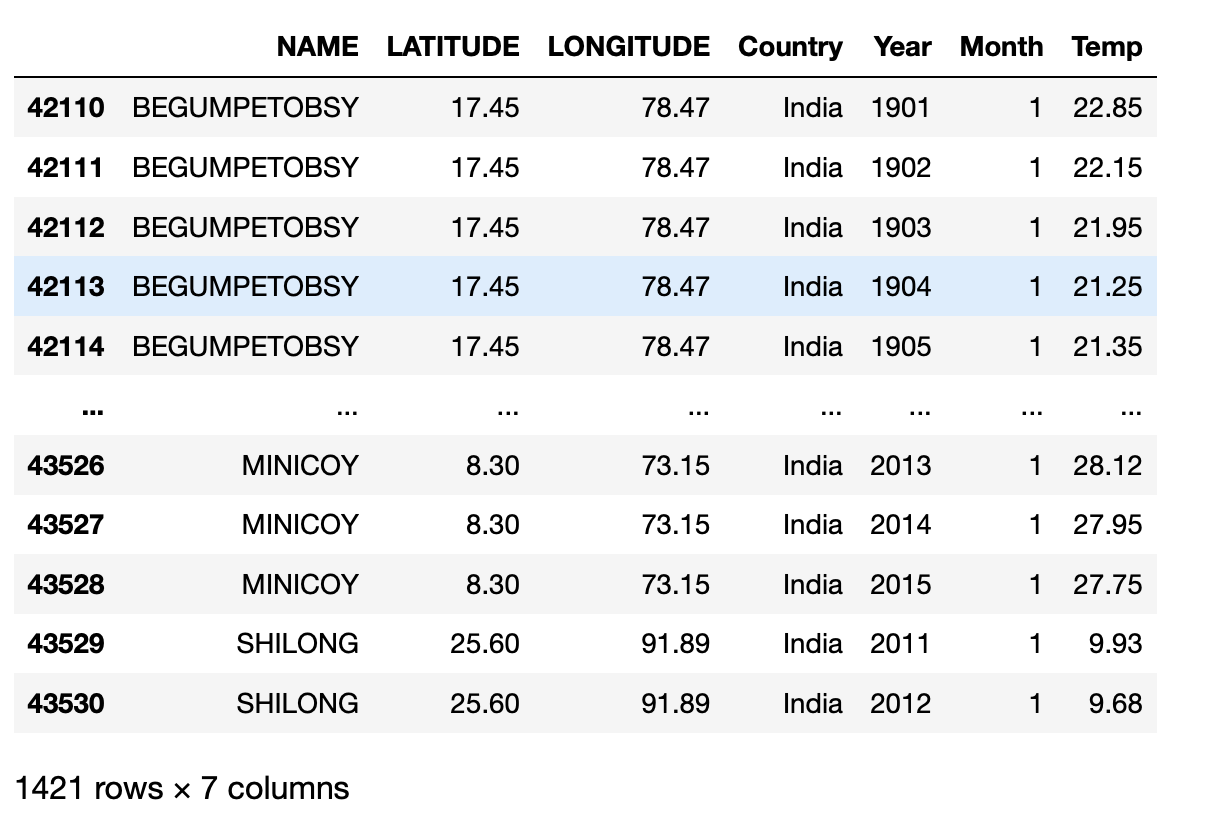

In [7]:
# the passing dataframe 'df' below is the dataframe you create "in part 2
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
42110,BEGUMPETOBSY,17.45,78.47,India,1901,1,22.85
42111,BEGUMPETOBSY,17.45,78.47,India,1902,1,22.15
42112,BEGUMPETOBSY,17.45,78.47,India,1903,1,21.95
42113,BEGUMPETOBSY,17.45,78.47,India,1904,1,21.25
42114,BEGUMPETOBSY,17.45,78.47,India,1905,1,21.35
...,...,...,...,...,...,...,...
43526,MINICOY,8.30,73.15,India,2013,1,28.12
43527,MINICOY,8.30,73.15,India,2014,1,27.95
43528,MINICOY,8.30,73.15,India,2015,1,27.75
43529,SHILONG,25.60,91.89,India,2011,1,9.93


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

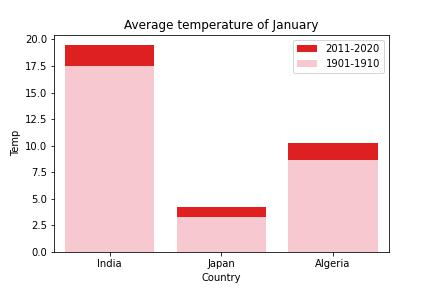

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

In [8]:
# Define inputs and functions
countries = ['Australia', 'Brazil', 'Italy', 'Japan']
months = [1,3,5,7,9,11]
months_name = ['January','March','May','July','September','November']
period_1 = [1901, 1910]
period_2 = [2011, 2020]

def average_temperature(df, country, year_begin, year_end, month):
    df_temp = query_climate(df, country, year_begin, year_end, month)
    avg = df_temp['Temp'].mean()
    return avg

def list_of_avgs(df, countries, months, period_1, period_2):
    ls = [[[average_temperature(df, country, period[0], period[1], month) 
            for country in countries] 
           for period in [period_1, period_2]] 
          for month in months]
                
    return ls

In [9]:
# Compute data for average temperatures
ls = list_of_avgs(df, countries, months, period_1, period_2)
data = np.array(ls)
data.shape

(6, 2, 4)

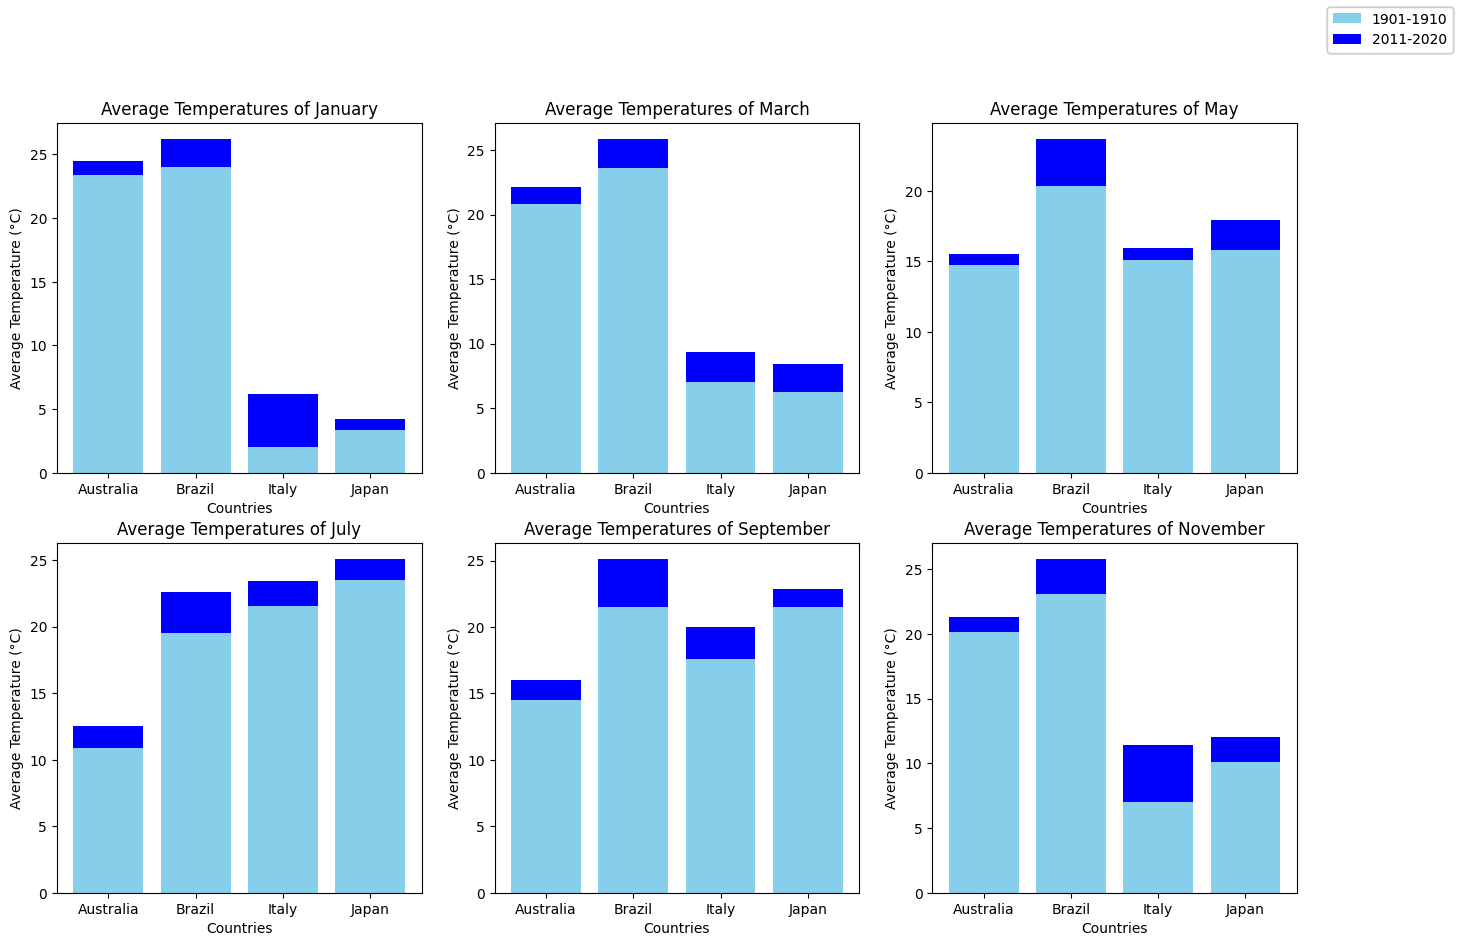

In [10]:
# Plot
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

for i, ax in enumerate(axs.flat):
    ax.bar(countries, data[i][0], color='skyblue')
    ax.bar(countries, data[i][1]-data[i][0], color='blue', bottom=data[i][0])
    ax.set_title(f'Average Temperatures of {months_name[i]}')
    ax.set_xlabel('Countries')
    ax.set_ylabel('Average Temperature (°C)')
    fig.legend(['1901-1910','2011-2020'])

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

### Plot 1
This plot is a Choropleth Map that reflects the average temperatures of each country in June during 2011-2020. I used helper functions defined above to construct a new dataframe for average temperatures. I chose years 2011-2020 because this period has more temperature information available and yields less null values for average temperature.

From the visualization we can tell that countries near the equator have higher average temperature. The farther they are located away from the equator the lower their average temperature is. The south and north poles have the lowest average temperature. 

In [11]:
# Create dataframe storing average temps of the countries
df_avg = pd.DataFrame()
df_avg['country'] = df['Country_Name'].unique()
for i in range(len(df_avg['country'])):
    df_avg.loc[i, 'average_temp'] = average_temperature(df, df_avg.loc[i, 'country'], 2011, 2020, 6)
df_avg

,country,average_temp
0,Algeria,26.642557
1,Azerbaijan,24.223830
2,Armenia,14.639070
3,Angola,20.556000
4,Argentina,10.219958
...,...,...
217,Wallis and Futuna,27.263684
218,Western Sahara,21.595000
219,Wake Island,28.576250
220,Swaziland,19.132857


In [12]:
# This cell solves the problem that plotly charts sometimes show blank
# Reference: https://stackoverflow.com/questions/52771328/plotly-chart-not-showing-in-jupyter-notebook
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype+notebook_connected'

In [13]:
# Plot
fig = px.choropleth(df_avg, locations="country",
                    locationmode = 'country names',
                    color="average_temp",            
                    hover_name="country",  
                    title = 'Average Tempratures (°C) in June During 2011-2020',
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

### Plot 2
This is a box plot visualizing the average temperatures during 2 periods, 1901-1910 and 2011-2020. I used helper functions defined above to construct new dataframes for average temperatures during each of the 2 periods. Then I concatenated them into a big dataframe and labeled the periods. To account for the different data availability during the 2 periods, I dropped the countries who do not have temperature measurements available for both periods to maintain consistency. 

From the box plot, we can tell that world average temperature is rising under global warming effect. The 1901-1910 period has all of its stats smaller than those of 2011-2020. 

In [14]:
df_avg_1 = pd.DataFrame()
df_avg_1['country'] = df['Country_Name'].unique()
df_avg_1['period'] = '2011-2020'
for i in range(len(df_avg_1['country'])):
    df_avg_1.loc[i, 'average_temp'] = average_temperature(df, df_avg_1.loc[i, 'country'], 2011, 2020, 6)

df_avg_2 = pd.DataFrame()
df_avg_2['country'] = df['Country_Name'].unique()
df_avg_2['period'] = '1901-1910'
for i in range(len(df_avg_2['country'])):
    df_avg_2.loc[i, 'average_temp'] = average_temperature(df, df_avg_2.loc[i, 'country'], 1901, 1910, 6)
    
df_avg_concat = pd.concat([df_avg_2, df_avg_1], ignore_index=True)
df_avg_concat

,country,period,average_temp
0,Algeria,1901-1910,22.424917
1,Azerbaijan,1901-1910,22.714000
2,Armenia,1901-1910,18.444000
3,Angola,1901-1910,23.280000
4,Argentina,1901-1910,7.762330
...,...,...,...
439,Wallis and Futuna,2011-2020,27.263684
440,Western Sahara,2011-2020,21.595000
441,Wake Island,2011-2020,28.576250
442,Swaziland,2011-2020,19.132857


In [15]:
# Identify countries with NaN values in average_temp during either period, drop these countries
nan_rows = df_avg_concat[df_avg_concat['average_temp'].isna()]
values_to_drop = nan_rows['country'].tolist()
df_avg_concat_dropped = df_avg_concat[~df_avg_concat['country'].isin(values_to_drop)]

df_avg_concat_dropped

,country,period,average_temp
0,Algeria,1901-1910,22.424917
1,Azerbaijan,1901-1910,22.714000
2,Armenia,1901-1910,18.444000
3,Angola,1901-1910,23.280000
4,Argentina,1901-1910,7.762330
...,...,...,...
371,Venezuela,2011-2020,27.017128
372,Vietnam,2011-2020,29.793086
373,"Virgin Islands, U.S.",2011-2020,28.810870
374,Samoa,2011-2020,26.950000


In [16]:
fig = px.box(df_avg_concat_dropped, y="period", x='average_temp', color='period', points="all", 
             title="Average Temperature (°C) in June", notched=True, hover_data=['country'])
fig.show()

### Plot 3
This heatmap visualizes the relationship between temperature measurements taken in June 2020 and the longitude and latitude where the measurements were taken. This is a bivariate plot. I created a new dataframe storing the June 2020 temperatures and corresponding latitude and plotted this density heatmap. 

From the heatmap, we can tell that countries near the equator have higher average temperature. The farther they are located away from the equator the lower their average temperature is. The south and north poles have the lowest average temperature.

The locations without temperature measurements are shown as having value 0 in the heatmap. 

In [17]:
# Create new dataframe storing June 2020 temperatures, longitude and latitude
df_lat = df[df["Year"] == 2020]
df_lat = df_lat.drop(columns=['ID','Station_Name','Country_Name','Year'])
mon_list = ["Mon_" + str(i) for i in range(1, 13)]
months_drop = [mon for mon in mon_list if mon != "Mon_6"]
df_lat = df_lat.drop(columns=months_drop)
# Drop rows without temp measurements
df_lat = df_lat.dropna(subset=['Mon_6'])
df_lat.columns = ['Temperature','Latitude','Longitude']
df_lat

,Temperature,Latitude,Longitude
19,23.17,36.7167,3.250
78,24.85,36.7200,4.050
152,21.90,35.1000,-1.850
172,31.80,34.8500,5.720
192,28.34,33.7997,2.890
...,...,...,...
181193,13.62,-22.4830,17.467
181203,13.20,-22.5000,18.967
181233,20.67,-22.9830,14.650
181247,27.75,-13.2330,-176.167


In [19]:
fig = px.density_heatmap(df_lat, x='Longitude', y="Latitude", z='Temperature', histfunc='avg',
                         title="Temperature (°C) in June 2020 vs Latitude of the Stations", 
                         color_continuous_scale=px.colors.diverging.Temps)
fig.show()

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell

https://github.com/xiangdilin/HW/tree/main